# Wine Classification Notebook

## Overview

Using wine data from portugese wines from https://archive.ics.uci.edu/ml/datasets/Wine+Quality
and  ml algorithm k-nearest neighbour
- Intro
- Data
- Look at data
- Pick model
- run model
- evaluate result

In [2]:
%matplotlib inline

In [8]:
#%pip install mglearn

In [11]:
#import libraries that we are goin to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn as mg

### Load the Wine data set

In [3]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
print("Keys: ", wine_dataset.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print( wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
print(wine_dataset['data'].shape)

(178, 13)


In [24]:
print(wine_dataset['target_names'])

['class_0' 'class_1' 'class_2']


Going to split the data set roughly 75/25 for training data and test data

Move the below down to after looking at the data
### Split the data into a training set and a test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state = 0) 

In [8]:
print(X_train.shape)
print(y_train.shape)

(133, 13)
(133,)


In [9]:
print(X_test.shape)
print(y_test.shape)

(45, 13)
(45,)


### Create a pandas dataframe to examine the data

In [12]:
wine_dataframe = pd.DataFrame(X_train, columns=wine_dataset.feature_names)

### Have a look at the statistics for this dataset

In [13]:
wine_dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,133.000000,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,12.999398,2.390977,2.365489,19.51203,100.458647,2.261579,1.956917,0.363985,1.609474,5.113083,0.947338,2.586015,749.812030
std,0.803811,1.122554,0.271995,3.52532,14.484846,0.613286,0.984769,0.127873,0.601056,2.405212,0.233392,0.725185,303.322165
min,11.030000,0.890000,1.360000,10.60000,70.000000,1.100000,0.470000,0.130000,0.420000,1.280000,0.540000,1.270000,312.000000
25%,12.370000,1.610000,2.210000,17.10000,89.000000,1.700000,1.020000,0.270000,1.150000,3.210000,0.770000,1.860000,515.000000
50%,13.050000,1.900000,2.360000,19.50000,98.000000,2.200000,2.040000,0.340000,1.560000,4.600000,0.950000,2.770000,675.000000
75%,13.640000,3.240000,2.560000,21.50000,107.000000,2.740000,2.790000,0.450000,1.960000,6.600000,1.110000,3.170000,985.000000
max,14.750000,5.650000,3.220000,30.00000,162.000000,3.880000,3.740000,0.660000,3.580000,13.000000,1.710000,4.000000,1547.000000


### Exaine the correlation in the data

In [14]:
wine_dataframe.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.075767,0.256718,-0.299783,0.218544,0.347907,0.298868,-0.125385,0.130503,0.559736,-0.049770,0.070435,0.606341
malic_acid,0.075767,1.000000,0.177144,0.275699,-0.059059,-0.331886,-0.413951,0.342139,-0.218618,0.285222,-0.536580,-0.393430,-0.204284
ash,0.256718,0.177144,1.000000,0.441566,0.192894,0.142715,0.084425,0.158981,0.010282,0.250790,-0.101623,-0.007915,0.169024
alcalinity_of_ash,-0.299783,0.275699,0.441566,1.000000,-0.103945,-0.336078,-0.410130,0.386922,-0.225062,0.000653,-0.254268,-0.292636,-0.468870
magnesium,0.218544,-0.059059,0.192894,-0.103945,1.000000,0.176772,0.173250,-0.321822,0.272961,0.123818,0.059497,0.038428,0.327131
total_phenols,0.347907,-0.331886,0.142715,-0.336078,0.176772,1.000000,0.861975,-0.439725,0.631039,-0.066523,0.449360,0.720759,0.548763
flavanoids,0.298868,-0.413951,0.084425,-0.410130,0.173250,0.861975,1.000000,-0.574793,0.656959,-0.204927,0.586514,0.801292,0.551821
nonflavanoid_phenols,-0.125385,0.342139,0.158981,0.386922,-0.321822,-0.439725,-0.574793,1.000000,-0.323471,0.186939,-0.318197,-0.494511,-0.356064
proanthocyanins,0.130503,-0.218618,0.010282,-0.225062,0.272961,0.631039,0.656959,-0.323471,1.000000,-0.030735,0.309837,0.509407,0.350407
color_intensity,0.559736,0.285222,0.250790,0.000653,0.123818,-0.066523,-0.204927,0.186939,-0.030735,1.000000,-0.538997,-0.449582,0.288204


Explain all the below - the function and the parameters
### Look at the data

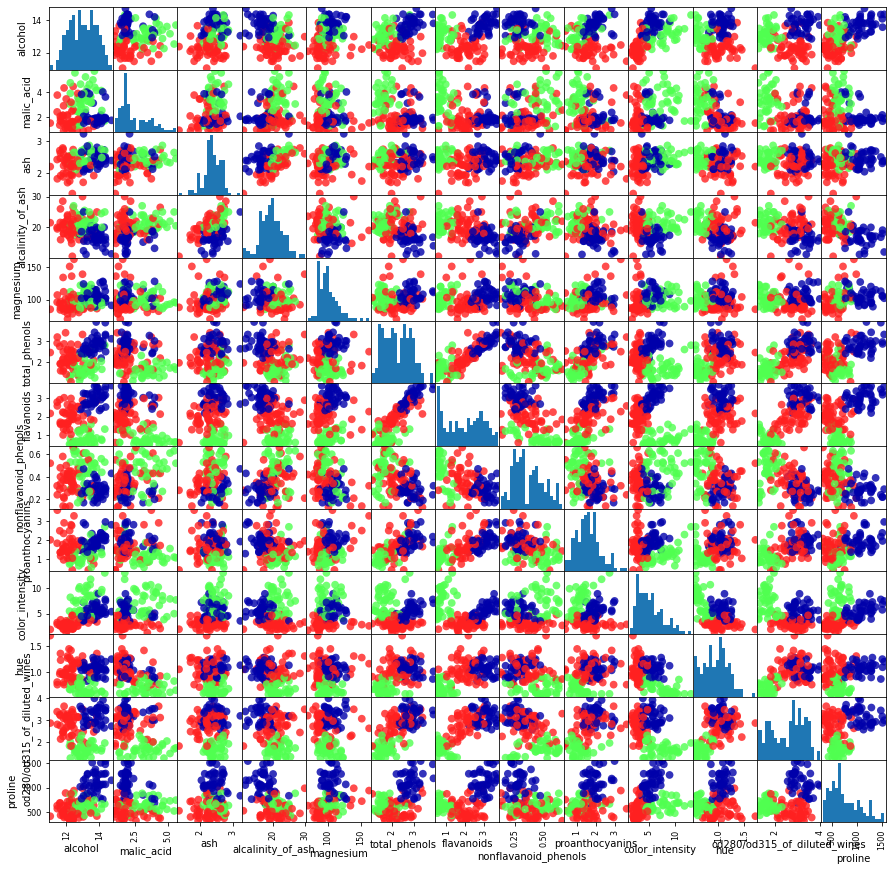

In [15]:
pd.plotting.scatter_matrix(wine_dataframe, c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mg.cm3)
plt.show()

### Pick a model to use for the training and prediction k-nearest-neighbour
explain k-nearest
this will build the model from the training to use for our predictions

In [20]:
wine_dataframe.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
1,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
2,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0
3,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0
4,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Make predictions
First make a new np array to hold the measuerments for the flower

In [21]:
x_New = np.array([[13.64,3.10,.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0]])
print(x_New.shape)

(1, 13)


In [22]:
prediction = knn.predict(x_New)
print('prediction = ', prediction)
print('predicted species label = ', wine_dataset['target_names'][prediction])

prediction =  [0]
predicted species label =  ['class_0']


### Evaluate the model's accuracy
by comparing predictions for the testset in which we know the class and see how accurate the predictions are

In [18]:
y_pred = knn.predict(X_test)
print('test set predictions = ', y_pred)

test set predictions =  [0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]


In [19]:
print("Test set score = {:.2f}".format(knn.score(X_test,y_test)))

Test set score = 0.76


## References
[1] Introduction to Machine Learning Andreas, C.Muller & Sarah Guido, O'Reilly,2018

## End